In [75]:
# define the investment calculator function
def invest_calculator(property_value, purchase_price, property_tax_r, morgage_balance, interest_r,
                      closing_cost, rent,vacancy_r, insurance_r, HOA_r, PM_fee_r,
                      repair_maintain_r, morgage_pay_m, cash_inv, appr_y):

    ## Operating Income Year1
    rental_income_y = rent*12
    
    ## Operating Expenses Year1
    property_tax_y    = property_tax_r*property_value
    vacancy_y         = vacancy_r*rent*12
    insurance_y       = insurance_r*rent*12
    HOA_y             = HOA_r*rent*12
    PM_fee_y          = PM_fee_r*rent*12
    repair_maintain_y = repair_maintain_r*rent*12
    total_op_exp      = property_tax_y+vacancy_y+insurance_y+HOA_y+PM_fee_y+repair_maintain_y
    
    ## Net operating income and cap rate
    NOI                 = rental_income_y-total_op_exp
    cap_r               = NOI/purchase_price
    
    ## cashflow and cash_on_cash_return
    interest_exp        = morgage_balance*interest_r
    net_inc_y           = NOI-interest_exp
    principal_payment_y = morgage_pay_m*12-interest_exp
    cashflow_y          = net_inc_y - principal_payment_y
    cash_on_cash_return = cashflow_y/cash_inv
    net_inc_m           = net_inc_y/12
    cashflow_m          = cashflow_y/12
    
    ## Total Rate of Return
    gain_appr           = property_value*appr_y
    tot_gain_y          = net_inc_y+gain_appr
    tot_return_y        = tot_gain_y/cash_inv
      
    return [cap_r, cashflow_y, cashflow_m, cash_on_cash_return, tot_gain_y, tot_return_y, principal_payment_y]

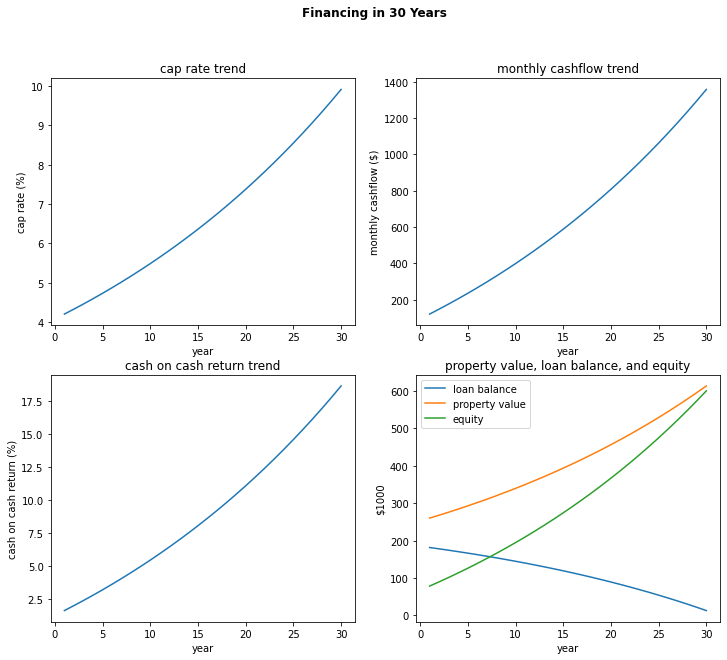

In [76]:
# import GUI library
from tkinter import *
import numpy as np
from matplotlib import pyplot as plt
from matplotlib.backends.backend_tkagg import FigureCanvasTkAgg

window=Tk()
# add widgets here

window.title('Property Investment Financial Forecasting Calculator')
window.geometry("1400x800+20+20")



def Calculate():
    purch     =int(purchase_price_entry.get())
    prop_t_r  =float(property_tax_r_entry.get())
    down_p_r  =float(down_pay_r_entry.get())
    ter       =int(term_entry.get())
    intere_r  =float(interest_r_entry.get())
    clos      =int(closing_cost_entry.get())
    ren       =int(rent_entry.get())
    vac_r     =float(vacancy_r_entry.get())
    ins_r     =float(insurance_r_entry.get())
    HOA_r     =float(HOA_r_entry.get())
    PM_r      =float(PM_fee_r_entry.get())
    rep_main  =float(repair_maintain_r_entry.get())
    apr_y     =float(appr_y_entry.get())
    ren_inc_r =float(rent_increase_entry.get())
        
    # initialization    
    prop_val           = purch
    mortgage_balance   = purch*(1-down_p_r)   
    mortgage_pay_m     = mortgage_balance*(intere_r/12.0)*(1.0+intere_r/12.0)**(ter*12.0)/((1.0+intere_r/12.0)**(ter*12.0) - 1.0)
    cash_invested      = purch*down_p_r+clos
    
    
    # setup outputs variables
    cap_rates         = []
    anu_cashfls       = []
    mon_cashfls       = []
    c_on_cs           = []
    anu_tot_gains     = []
    anu_tot_rets      = []
    tot_acc_gains     = []
    tot_acc_rets      = []
    mortgage_balances = []
    prop_vals         = []
    equities          = []
    
    for year in range(30):
        [cap_rate, anu_cashfl, 
         mon_cashfl, c_on_c, 
         anu_tot_gain, anu_tot_ret, 
         principal_payment_y] = invest_calculator(prop_val, purch, prop_t_r, mortgage_balance,
                                                  intere_r,clos, ren,vac_r, ins_r, 
                                                  HOA_r,PM_r, rep_main, mortgage_pay_m, 
                                                  cash_invested, apr_y)
        # update outputs
        cap_rates.append(cap_rate*100)
        anu_cashfls.append(anu_cashfl)
        mon_cashfls.append(mon_cashfl)
        c_on_cs.append(c_on_c*100)
        anu_tot_gains.append(anu_tot_gain)
        anu_tot_rets.append(anu_tot_ret)
        mortgage_balances.append(mortgage_balance/1000)
        prop_vals.append(prop_val/1000)
        equities.append((prop_val - mortgage_balance)/1000)
        
        if (year == 0):
            tot_acc_gains.append(anu_tot_gain)
            tot_acc_rets.append(anu_tot_ret)
        else:
            tot_acc_gains.append(tot_acc_gains[year-1]+anu_tot_gain)
            tot_acc_rets.append(tot_acc_rets[year-1]+anu_tot_ret)
        
        # update input variables
        prop_val           = prop_val*(1+apr_y)
        ren              = ren*(1+ren_inc_r)
        mortgage_balance = mortgage_balance - principal_payment_y
        
    # show the year 1 results
    Label(text="              ",font="arial 15 bold").place(x=220,y=420)
    Label(text=f"{round(cap_rates[0],2)}%",font="arial 15").place(x=220,y=420)
    
    Label(text="              ",font="arial 15 bold").place(x=220,y=460)
    Label(text=f"${round(anu_cashfls[0],1)}",font="arial 15").place(x=220,y=460)
    
    Label(text="              ",font="arial 15 bold").place(x=220,y=500)
    Label(text=f"${round(mon_cashfls[0],1)}",font="arial 15").place(x=220,y=500)
    
    Label(text="              ",font="arial 15 bold").place(x=220,y=540)
    Label(text=f"{round(c_on_cs[0],2)}%",font="arial 15").place(x=220,y=540) 
    
    Label(text="              ",font="arial 15 bold").place(x=220,y=580)
    Label(text=f"${round(anu_tot_gains[0],1)}",font="arial 15").place(x=220,y=580)  
    
    Label(text="              ",font="arial 15 bold").place(x=220,y=620)
    Label(text=f"{round(anu_tot_rets[0]*100,2)}%",font="arial 15").place(x=220,y=620)

    Label(text="              ",font="arial 15 bold").place(x=220,y=660)
    Label(text=f"${round(tot_acc_gains[0],1)}",font="arial 15").place(x=220,y=660)
    
    Label(text="              ",font="arial 15 bold").place(x=220,y=700)
    Label(text=f"{round(tot_acc_rets[0]*100,2)}%",font="arial 15").place(x=220,y=700)
    
    # show the year 3 results
    Label(text="              ",font="arial 15 bold").place(x=320,y=420)
    Label(text=f"{round(cap_rates[2],2)}%",font="arial 15").place(x=320,y=420)
    
    Label(text="              ",font="arial 15 bold").place(x=320,y=460)
    Label(text=f"${round(anu_cashfls[2],1)}",font="arial 15").place(x=320,y=460)
    
    Label(text="              ",font="arial 15 bold").place(x=320,y=500)
    Label(text=f"${round(mon_cashfls[2],1)}",font="arial 15").place(x=320,y=500)
    
    Label(text="              ",font="arial 15 bold").place(x=320,y=540)
    Label(text=f"{round(c_on_cs[2],2)}%",font="arial 15").place(x=320,y=540) 
    
    Label(text="              ",font="arial 15 bold").place(x=320,y=580)
    Label(text=f"${round(anu_tot_gains[2],1)}",font="arial 15").place(x=320,y=580)  
    
    Label(text="              ",font="arial 15 bold").place(x=320,y=620)
    Label(text=f"{round(anu_tot_rets[2]*100,2)}%",font="arial 15").place(x=320,y=620) 
    
    Label(text="              ",font="arial 15 bold").place(x=320,y=660)
    Label(text=f"${round(tot_acc_gains[2],1)}",font="arial 15").place(x=320,y=660)  
    
    Label(text="              ",font="arial 15 bold").place(x=320,y=700)
    Label(text=f"{round(tot_acc_rets[2]*100,2)}%",font="arial 15").place(x=320,y=700)  
    
    # show the year 5 results
    Label(text="              ",font="arial 15 bold").place(x=420,y=420)
    Label(text=f"{round(cap_rates[4],2)}%",font="arial 15").place(x=420,y=420)
    
    Label(text="              ",font="arial 15 bold").place(x=420,y=460)
    Label(text=f"${round(anu_cashfls[4],1)}",font="arial 15").place(x=420,y=460)
    
    Label(text="              ",font="arial 15 bold").place(x=420,y=500)
    Label(text=f"${round(mon_cashfls[4],1)}",font="arial 15").place(x=420,y=500)
    
    Label(text="              ",font="arial 15 bold").place(x=420,y=540)
    Label(text=f"{round(c_on_cs[4],2)}%",font="arial 15").place(x=420,y=540) 
    
    Label(text="              ",font="arial 15 bold").place(x=420,y=580)
    Label(text=f"${round(anu_tot_gains[4],1)}",font="arial 15").place(x=420,y=580)  
    
    Label(text="              ",font="arial 15 bold").place(x=420,y=620)
    Label(text=f"{round(anu_tot_rets[4]*100,2)}%",font="arial 15").place(x=420,y=620) 
    
    Label(text="              ",font="arial 15 bold").place(x=420,y=660)
    Label(text=f"${round(tot_acc_gains[4],1)}",font="arial 15").place(x=420,y=660)  
    
    Label(text="              ",font="arial 15 bold").place(x=420,y=700)
    Label(text=f"{round(tot_acc_rets[4]*100,2)}%",font="arial 15").place(x=420,y=700)  
    
    # Plot the results
    yr = list(range(1,30+1))

   # figure, ((ax1, ax2), (ax3, ax4)) = plt.subplots(ncols=2, nrows = 2, figsize=(8, 7))
    
    figure, ((ax1, ax2), (ax3, ax4)) = plt.subplots(ncols=2, nrows = 2, figsize=(12, 10))
    figure.suptitle('Financing in 30 Years', weight='bold')
    #figure = plt.figure(figsize = (8, 7), dpi = 100)
    #figure.add_subplot(221).plot(yr, cap_rates)
    #figure.add_subplot(222).plot(yr, mon_cashfls)
    #figure.add_subplot(223).plot(yr, c_on_cs)
    #figure.add_subplot(224).plot(yr, mortgage_balances, yr, prop_vals, yr, equities)
    
    ax1.plot(yr, cap_rates)
    ax1.set_title('cap rate trend')
    ax1.set_xlabel('year')
    ax1.set_ylabel('cap rate (%)')
    
    ax2.plot(yr, mon_cashfls)
    ax2.set_title('monthly cashflow trend')
    ax2.set_xlabel('year')
    ax2.set_ylabel('monthly cashflow ($)')
    
    ax3.plot(yr, c_on_cs)
    ax3.set_title('cash on cash return trend')
    ax3.set_xlabel('year')
    ax3.set_ylabel('cash on cash return (%)')
    
    ax4.plot(yr, mortgage_balances, yr, prop_vals, yr, equities)
    ax4.set_title('property value, loan balance, and equity')
    ax4.legend(['loan balance','property value', 'equity'])
    ax4.set_xlabel('year')
    ax4.set_ylabel('$1000')

    chart  = FigureCanvasTkAgg(figure, window)
    chart.get_tk_widget().place(x = 550, y = 20)
    
    #figure.add_subplot(422).plot(yr, anu_cashfls)
    #figure.add_subplot(425).plot(yr, anu_tot_gains)
    #figure.add_subplot(426).plot(yr, anu_tot_rets)
    #figure.add_subplot(223).plot(yr, tot_acc_gains)
    #figure.add_subplot(428).plot(yr, tot_acc_rets)
    # plt.grid()
    # axes = plt.axes()
    # axes.set_xlim([0, 6.3])
    # axes.set_ylim([-3, 3])
    
# show the output variable names
purchase_price_label          = Label(window,text="Purchase Price",font="arial 15")
property_tax_r_label          = Label(window,text="Property Tax Rate",font="arial 15")
down_pay_r_label              = Label(window,text="Down Pay Rate",font="arial 15")
term_label                    = Label(window,text="Term(years)",font="arial 15")
interest_r_label              = Label(window,text="Interest Rate",font="arial 15")
closing_cost_label            = Label(window,text="Closing Cost",font="arial 15")
rent_label                    = Label(window,text="Rent",font="arial 15")
vacancy_r_label               = Label(window,text="Vacancy Rate",font="arial 15")
insurance_r_label             = Label(window,text="Insurance Rate",font="arial 15")
HOA_r_label                   = Label(window,text="HOA Rate",font="arial 15")
PM_fee_r_label                = Label(window,text="PM Fee Rate",font="arial 15")
repair_maintain_r_label       = Label(window,text="Repair and Maintain Rate",font="arial 15")
appr_y_label                  = Label(window,text="Annual Appreciation Rate",font="arial 15")
rent_increase_label           = Label(window,text="Annual Rent Change Rate",font="arial 15")

purchase_price_label.place(x=25,y=20)
property_tax_r_label.place(x=25,y=60)
down_pay_r_label.place(x=25,y=100)
term_label.place(x=25,y=140)
interest_r_label.place(x=25,y=180)
closing_cost_label.place(x=25,y=220)
rent_label.place(x=25,y=260)
vacancy_r_label.place(x=250,y=20)
insurance_r_label.place(x=250,y=60)
HOA_r_label.place(x=250,y=100)
PM_fee_r_label.place(x=250,y=140)
repair_maintain_r_label.place(x=250,y=180)
appr_y_label.place(x=250,y=220)
rent_increase_label.place(x=250,y=260)

purchase_price_value=StringVar()
property_tax_r_value=StringVar()
down_pay_r_value=StringVar()
term_value=StringVar()
interest_r_value=StringVar()
closing_cost_value=StringVar()
rent_value=StringVar()
vacancy_r_value=StringVar()
insurance_r_value=StringVar()
HOA_r_value=StringVar()
PM_fee_r_value=StringVar()
repair_maintain_r_value=StringVar()
appr_y_value=StringVar()
rent_increase_value=StringVar()

purchase_price_entry=Entry(window,textvariable=purchase_price_value,font="arial 15", width=8)
purchase_price_entry.insert(0, "259999")
purchase_price_entry.pack()

property_tax_r_entry=Entry(window,textvariable=property_tax_r_value,font="arial 15", width=8)
property_tax_r_entry.insert(0, "0.0268")
property_tax_r_entry.pack()

down_pay_r_entry    =Entry(window,textvariable=down_pay_r_value,font="arial 15", width=8)
down_pay_r_entry.insert(0, "0.302")
down_pay_r_entry.pack()

term_entry          =Entry(window,textvariable=term_value,font="arial 15", width=8)
term_entry.insert(0, "30")
term_entry.pack()

interest_r_entry    =Entry(window,textvariable=interest_r_value,font="arial 15", width=8)
interest_r_entry.insert(0, "0.0325")
interest_r_entry.pack()

closing_cost_entry  =Entry(window,textvariable=closing_cost_value,font="arial 15", width=8)
closing_cost_entry.insert(0, "8927")
closing_cost_entry.pack()

rent_entry          =Entry(window,textvariable=rent_value,font="arial 15", width=8)
rent_entry.insert(0, "1750")
purchase_price_entry.pack()

vacancy_r_entry     =Entry(window,textvariable=vacancy_r_value,font="arial 15", width=8)
vacancy_r_entry.insert(0, "0.03")
vacancy_r_entry.pack()

insurance_r_entry   =Entry(window,textvariable=insurance_r_value,font="arial 15", width=8)
insurance_r_entry.insert(0, "0.0307")
insurance_r_entry.pack()

HOA_r_entry         =Entry(window,textvariable=HOA_r_value,font="arial 15", width=8)
HOA_r_entry.insert(0, "0.007")
HOA_r_entry.pack()

PM_fee_r_entry      =Entry(window,textvariable=PM_fee_r_value,font="arial 15", width=8)
PM_fee_r_entry.insert(0, "0.06")
PM_fee_r_entry.pack()

repair_maintain_r_entry=Entry(window,textvariable=repair_maintain_r_value,font="arial 15", width=8)
repair_maintain_r_entry.insert(0, "0.02")
repair_maintain_r_entry.pack()

appr_y_entry        =Entry(window,textvariable=appr_y_value,font="arial 15", width=8)
appr_y_entry.insert(0, "0.03")
appr_y_entry.pack()

rent_increase_entry =Entry(window,textvariable=rent_increase_value,font="arial 15", width=8)
rent_increase_entry.insert(0, "0.03")
rent_increase_entry.pack()

# input entry position
purchase_price_entry.place(x=150,y=20)
property_tax_r_entry.place(x=150,y=60)
down_pay_r_entry.place(x=150,y=100)
term_entry.place(x=150,y=140)
interest_r_entry.place(x=150,y=180)
closing_cost_entry.place(x=150,y=220)
rent_entry.place(x=150,y=260)
vacancy_r_entry.place(x=430,y=20)
insurance_r_entry.place(x=430,y=60)
HOA_r_entry.place(x=430,y=100)
PM_fee_r_entry.place(x=430,y=140)
repair_maintain_r_entry.place(x=430,y=180)
appr_y_entry.place(x=430,y=220)
rent_increase_entry.place(x=430,y=260)

##output labels
cap_rate     = Label(window,text="Cap Rate:",font="arial 15")
anu_cashfl   = Label(window,text="Annual Cash Flow:",font="arial 15")
mon_cashfl   = Label(window,text="Monthly Cash Flow:",font="arial 15")
c_on_c       = Label(window,text="Cash on Cash Return:",font="arial 15")
anu_tot_gain = Label(window,text="Annual Total Gain:",font="arial 15")
anu_tot_ret  = Label(window,text="Annual Total Return:",font="arial 15")
tot_acc_gain = Label(window,text="Cumulative Gain:",font="arial 15")
tot_acc_ret  = Label(window,text="Cumulative Return:",font="arial 15")

year1 = Label(window,text="YEAR 1",font="arial 15 bold")
year3 = Label(window,text="YEAR 3",font="arial 15 bold")
year5 = Label(window,text="YEAR 5",font="arial 15 bold")

## output label positions
cap_rate.place(x=25,y=420)
anu_cashfl.place(x=25,y=460)
mon_cashfl.place(x=25,y=500)
c_on_c.place(x=25,y=540)
anu_tot_gain.place(x=25,y=580)
anu_tot_ret.place(x=25,y=620)
tot_acc_gain.place(x=25,y=660)
tot_acc_ret.place(x=25,y=700)

year1.place(x=215,y=385)
year3.place(x=315,y=385)
year5.place(x=415,y=385)

## Calculate button to get output

Button(window,text="Calculate",font="arial 15 bold",command=Calculate).place(x=210,y=320)
#Button(window,text="Exit",command=lambda:exit(),font="arial 15 bold",width=8).place(x=300,y=310)

window.mainloop()